In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

import imblearn

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
X = df.iloc[:,:-1]
y = df['Class']

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "regular data points.")

We have 492 fraud data points and 284315 regular data points.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
print("Size of training set: ", X_train.shape)

Size of training set:  (190820, 30)


# Simplest Neural Network (for testing)

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu'))     # kernel_initializer='normal'
model.add(Dense(1, activation='sigmoid'))                 # kernel_initializer='normal'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=1)

5964/5964 [==============================] - 10s 1ms/step - loss: 5.3778 - accuracy: 0.9966


In [12]:
print("Loss: ", model.evaluate(X_test, y_test, verbose=0))

Loss:  [0.13665655255317688, 0.9879451394081116]


In [16]:
y_predicted = model.predict(X_test).T[0].astype(int)

2938/2938 [==============================] - 4s 1ms/step


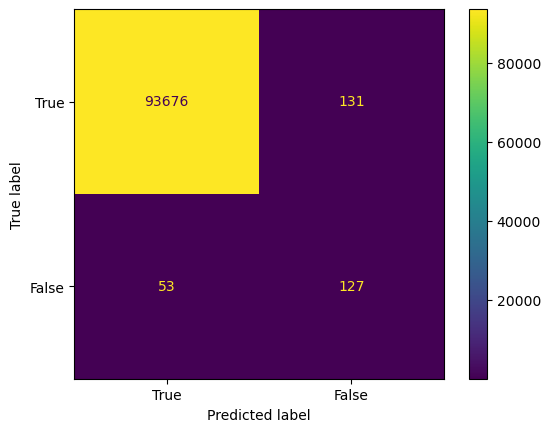

In [19]:
y_right = np.array(y_test)
confusion_matrix = metrics.confusion_matrix(y_right, y_predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
cm_display.plot()
plt.show()

In [21]:
metrics.classification_report(y_right, y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     93807\n           1       0.49      0.71      0.58       180\n\n    accuracy                           1.00     93987\n   macro avg       0.75      0.85      0.79     93987\nweighted avg       1.00      1.00      1.00     93987\n'

# Neural Network after Oversampling, Scaling, and PCA (10 components)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X_train_sampled, y_train_sampled = sampler.fit_resample(X_train, y_train)
y_train_sampled
X2= X_train_sampled.iloc[:,:-1]
y2= y_train_sampled

data = scale(X2)
pca = PCA(n_components=10)
X2 = pca.fit_transform(data)
X2

array([[-2.96178033, -1.03107332, -0.50046059, ...,  0.14623143,
        -1.34400486,  0.04223707],
       [-2.22754924,  0.09165706,  0.43348196, ...,  0.49850012,
        -0.08985453,  0.20642138],
       [-2.15460271, -0.19756951, -0.28162701, ..., -2.62512691,
         0.75998482,  0.95828829],
       ...,
       [ 7.91168119,  1.29611684,  1.23973995, ...,  0.05772619,
        -0.19082501, -1.34330728],
       [ 4.24082431, -0.3432715 ,  0.94532986, ...,  1.758318  ,
         0.58677359, -1.25966624],
       [ 7.45220353,  1.47408704,  1.38409997, ...,  0.50406915,
         0.63567102, -0.4243744 ]])

In [33]:
model2 = Sequential()
model2.add(Dense(10, input_dim=10, activation='relu')) 
model2.add(Dense(27, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(15, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 27)                297       
                                                                 
 dense_4 (Dense)             (None, 20)                560       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,298
Trainable params: 1,298
Non-trainable params: 0
_________________________________________________________________


In [34]:
X2_test = pca.fit_transform(X_test)
h = model2.fit(X2, y2, epochs=5, validation_data=(X2_test, y_test))

Epoch 1/5
11907/11907 [==============================] - 28s 2ms/step - loss: 0.0772 - accuracy: 0.9708 - val_loss: 40388.1094 - val_accuracy: 0.4718
Epoch 2/5
11907/11907 [==============================] - 23s 2ms/step - loss: 0.0483 - accuracy: 0.9820 - val_loss: 34605.3594 - val_accuracy: 0.4718
Epoch 3/5
11907/11907 [==============================] - 27s 2ms/step - loss: 0.0388 - accuracy: 0.9860 - val_loss: 30039.6250 - val_accuracy: 0.4719
Epoch 4/5
11907/11907 [==============================] - 24s 2ms/step - loss: 0.0339 - accuracy: 0.9880 - val_loss: 40670.3750 - val_accuracy: 0.4718
Epoch 5/5
11907/11907 [==============================] - 27s 2ms/step - loss: 0.0307 - accuracy: 0.9893 - val_loss: 30672.0156 - val_accuracy: 0.4718


In [35]:
print("Loss: ", model2.evaluate(X2_test, y_test, verbose=2))

2938/2938 - 3s - loss: 30672.0156 - accuracy: 0.4718 - 3s/epoch - 1ms/step
Loss:  [30672.015625, 0.47182056307792664]


In [36]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y_test)

2938/2938 [==============================] - 4s 1ms/step


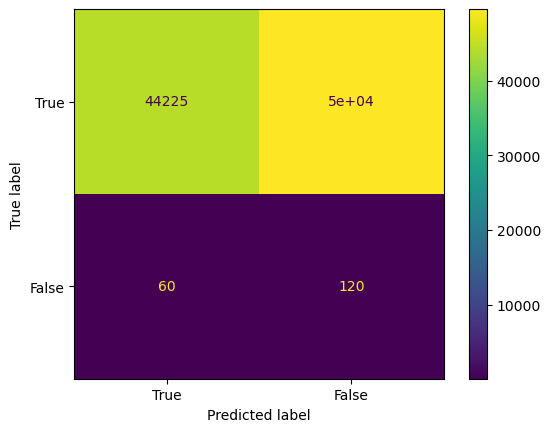

'              precision    recall  f1-score   support\n\n           0       1.00      0.47      0.64     93807\n           1       0.00      0.67      0.00       180\n\n    accuracy                           0.47     93987\n   macro avg       0.50      0.57      0.32     93987\nweighted avg       1.00      0.47      0.64     93987\n'

In [37]:
confusion_matrix2 = metrics.confusion_matrix(y2_correct, y2_predicted)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [True, False])
cm_display2.plot()
plt.show()
metrics.classification_report(y2_correct, y2_predicted)